In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random, ase, tqdm
import qml, glob, pickle
import ase.visualize

ModuleNotFoundError: No module named 'ase'

# Basic EDA

In [33]:
train, test = pd.read_csv('../data/train.csv'), pd.read_csv('../data/test.csv')
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


/home/lanfear/anaconda3/envs/tf_intro/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


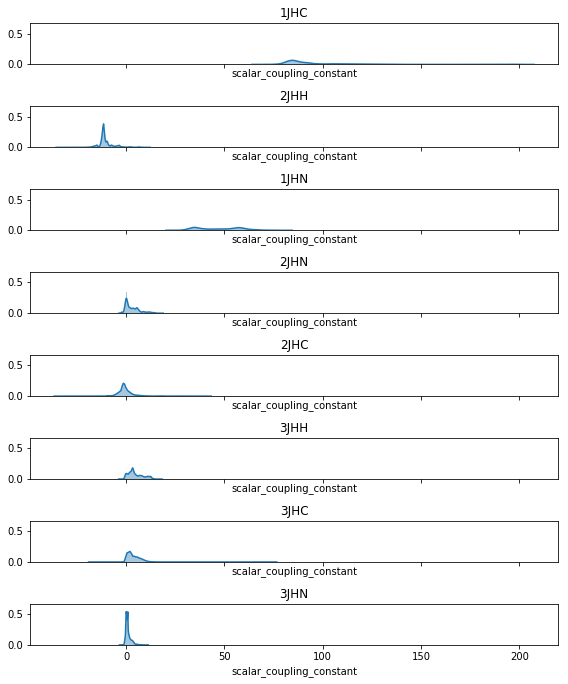

In [18]:
# Target distribution
f,a=plt.subplots(8,1,figsize=(8,1.2*8), sharex=True, sharey=True)
for i, sc_type in enumerate(train['type'].unique()):
    a[i].set_title(sc_type)
    sns.distplot(train[train['type'] == sc_type]['scalar_coupling_constant'], kde=True, bins=100 , ax=a[i])
plt.tight_layout()

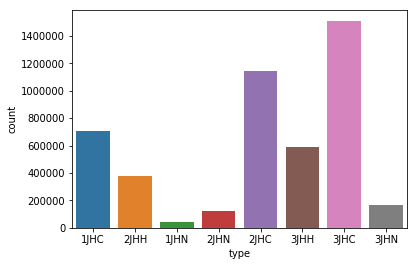

In [6]:
# Type histogram
sns.countplot(train['type'])

# Molecule visualization

In [28]:
struct

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377
7,dsgdb9nsd_000002,2,H,0.915789,1.358745,-0.028758
8,dsgdb9nsd_000002,3,H,-0.520278,1.343532,-0.775543
9,dsgdb9nsd_000003,0,O,-0.034360,0.977540,0.007602


In [14]:
struct = pd.read_csv('../data/structures.csv')
struct.loc[struct.molecule_name == 'dsgdb9nsd_000047', ['atom_index', 'atom', 'x', 'y', 'z']].reset_index(drop=True)
gb = struct.groupby('molecule_name')

/Users/miguelrita/anaconda2/envs/titanic/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


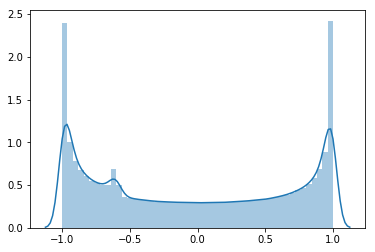

In [27]:
angs = pd.read_hdf('../features/simple_angles_cos_train.h5')
angs=angs['j3_torsion_angle_cos'].values
angs = angs[~np.isnan(angs)]
sns.distplot(angs)

In [58]:
xyz_files = glob.glob('../data/structures/*.xyz')
ase_cp = ase.io.read('../data/structures/dsgdb9nsd_000060.xyz')

In [59]:
ase.visualize.view(ase_cp, viewer='x3d')

count    130775.000000
mean         18.035993
std           2.938363
min           3.000000
1%           11.000000
2%           12.000000
5%           13.000000
50%          18.000000
max          29.000000
Name: atom_index, dtype: float64


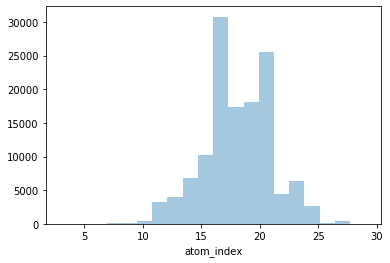

In [5]:
# Molecule size distribution

struct = pd.read_csv('../data/structures.csv')
num_atoms = struct.groupby('molecule_name').count()['atom_index']
print(num_atoms.describe(percentiles=[.01,.02,.05]))
sns.distplot(num_atoms, kde=False, bins=20)

# Coloumb matrix demo

In [78]:
compound = qml.Compound(xyz=xyz_files[0])
compound.generate_coulomb_matrix(size=29, sorting='unsorted')
cm_tri = compound.representation

In [79]:
size = 29
# cm_tri = cm_tri[::-1]
# cm = np.zeros((size, size))
# for i in range(size):
#     cm[i,i:] = cm_tri[-size+i:][::-1]
#     cm_tri = np.roll(cm_tri, size-i)
# cm += np.triu(cm, k=1).T
# cm
cm_tri = cm_tri[::-1]
cm = np.zeros((size, size))
for i in range(size):
    cm[:i+1,i] = cm_tri[-(i+1):][::-1]
    cm_tri = np.roll(cm_tri, i+1)
cm += np.triu(cm, k=1).T
cm

array([[36.8581052 , 22.86877504, 17.13453543, 10.70766726, 12.88688283,
         8.71126821, 11.6153868 , 13.39847809, 27.5713708 ,  5.48409337,
         5.49728009,  2.68882594,  2.61754782,  1.61250923,  1.40229111,
         1.3675792 ,  1.19031642,  2.34388038,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [22.86877504, 36.8581052 , 23.21316468, 11.9935453 , 11.38579162,
         7.94900002, 11.65935385, 13.2760464 , 19.49756675,  2.67563932,
         2.62181942,  5.49524306,  5.49844309,  1.75612919,  1.60854572,
         1.18415235,  1.12549285,  2.07846675,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [17.13453543, 23.21316468, 36.8581052 , 23.56038327, 19.68119663,
        11.38766129, 16.96059901, 22.27955387, 27.65397042,  2.24638035,
  

In [90]:
tfs = pd.read_hdf('../features/cm_unsorted_maxterms_5_train.h5')
tfs.head()

,sorted_CM_0_atom_0,sorted_CM_1_atom_0,sorted_CM_2_atom_0,sorted_CM_3_atom_0,sorted_CM_4_atom_0,sorted_CM_0_atom_1,sorted_CM_1_atom_1,sorted_CM_2_atom_1,sorted_CM_3_atom_1,sorted_CM_4_atom_1
0,5.494742,0.560815,0.560806,0.560803,0.5,36.858105,5.494775,5.494769,5.494749,5.494742
1,5.494742,0.560815,0.560806,0.560803,0.5,5.494749,0.560815,0.560806,0.560803,0.500000
2,5.494742,0.560815,0.560806,0.560803,0.5,5.494775,0.560806,0.560806,0.560803,0.500000
3,5.494742,0.560815,0.560806,0.560803,0.5,5.494769,0.560806,0.560806,0.560803,0.500000
4,5.494749,0.560815,0.560806,0.560803,0.5,36.858105,5.494775,5.494769,5.494749,5.494742


/home/lanfear/anaconda3/envs/tf_intro/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


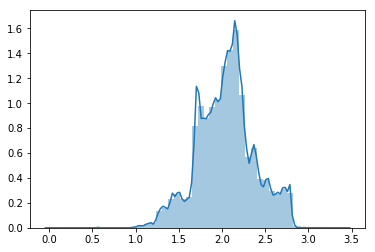

In [97]:
sns.distplot(tfs.values[:,4])

# Expand train and test with bonding chain positions (prototype)

In [37]:
struct = pd.read_csv('../data/structures.csv')
expand_train = train.copy().iloc[:1000,:]
expand_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548


In [31]:
struct.head(3)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277


In [50]:
# Load report dict
with open(f'../data/aux/rep_dict.pkl', 'rb') as h:
    rep_dict = pickle.load(h)
rep_dict['dsgdb9nsd_000001']

{'bond_angles': array([[  2.   ,   0.   ,   3.   , 109.472],
        [  1.   ,   0.   ,   3.   , 109.471],
        [  3.   ,   0.   ,   4.   , 109.472],
        [  1.   ,   0.   ,   2.   , 109.468],
        [  2.   ,   0.   ,   4.   , 109.471],
        [  1.   ,   0.   ,   4.   , 109.472]]), 'torsion_angles': None}

In [56]:
# Num of bonds of the J interaction
expand_train['chain'] = expand_train['type'].apply(lambda t : int(t[0]))

# Add empty cols for all indexes and coordinates of atoms along J bond
c_list = ['a0_i', 'a1_i', 'a2_i', 'a3_i'] # Indexes
for a in ['a0', 'a1', 'a2', 'a3']:
    c_list.extend([f'{a}_{coord}' for coord in ['x', 'y', 'z']])
# Add bond and torsion angle features
    c_list.extend(['bond_angle', 'bond_angle_cos', 'torsion_angle', 'torsion_angle_cos'])

for c in c_list:
    expand_train[c] = np.nan
    

for i,row in tqdm.tqdm(enumerate(expand_train.itertuples(index=True))):
    
    # Fill first and last indexes
    expand_train.loc[row.Index, 'a0_i'] = row.atom_index_0
    expand_train.loc[row.Index, f'a{row.chain}_i'] = row.atom_index_1
    
    bond_angles = rep_dict[row.molecule_name]['bond_angles']
    torsion_angles = rep_dict[row.molecule_name]['torsion_angles']
    
    # Fill middle indexes from report
    if row.chain == 2:
        valid_bonds = bond_angles[(bond_angles[:,0]==row.a0_i) & (bond_angles[:-2]==row.a2_i), :]
        assert valid_bonds.shape[1] == 1
        expand_train.loc[row.Index, 'a1_i'] = valid_bonds[1] # Added index of middle atom
        
        # Bond angle features
        expand_train.loc[row.Index, 'bond_angle'] = valid_bonds[-1]
        expand_train.loc[row.Index, 'bond_angle_cos'] = np.cos(np.radians(valid_bonds[-1]))
        
    elif row.chain == 3:
        valid_torsions = torsion_angles[(torsion_angles[:,0]==row.a0_i) & (torsion_angles[:-2]==row.a3_i), :]
        assert valid_torsions.shape[1] == 1
        expand_train.loc[row.Index, ['a1_i', 'a2_i']] = valid_torsions[1:3] # Added indexes of middle atoms
        
        # Torsion angle features
        expand_train.loc[row.Index, 'torsion_angle'] = valid_torsions[-1]
        expand_train.loc[row.Index, 'torsion_angle_cos'] = np.cos(np.radians(valid_torsions[-1]))

expand_train.head(10)

0it [00:00, ?it/s]


ValueError: operands could not be broadcast together with shapes (6,) (4,4) 

In [72]:
te = pd.read_hdf('../features/simple_angles_cos_train.h5')
te.head(30)

,j2_bond_angle_cos,j3_torsion_angle_cos
0,NaN,NaN
1,-0.883393,NaN
2,-0.884795,NaN
3,-0.885260,NaN
4,NaN,NaN
5,-0.885260,NaN
6,-0.884795,NaN
7,NaN,NaN
8,-0.885260,NaN
9,NaN,NaN
